## ***Note :***
**For this EDA, 'Stroke' is the target variable(dependent on other features) and all other columns are feature variables. We will be finding out whether stroke risk depends on other given feature variables.**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# ***Importing dataset***

In [49]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# ***Data Cleaning***

**No use of 'id' column in EDA. Hence, dropping the 'id' column.**

In [50]:
df.drop('id',axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Handling duplicate values in dataset**

In [52]:
df.duplicated().sum()

0

# ***Handling null values***

**Calculate missing(null-values) in each column**

In [53]:
df.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


**Only 'bmi' column has null values.**


**Imputing null values in 'bmi' column using the mean of 'bmi' column.**

In [54]:
# filling null in bmi with mean value
mean_bmi = df.bmi.mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)

**Check if there are any null values remaining**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [56]:
df.age.describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


### **Gender analysis**

In [57]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


**As number of 'Other' is only one, we can safely ignore it**

In [58]:
df['gender'] = df['gender'][df['gender']!='Other']

In [59]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


# ***Univariate Analysis***

**Dividing variables into categorical and numerical variables.**

In [60]:
categorical=[]
numerical=[]
for col in df.columns:
    if df[col].nunique()>10:
        numerical.append(col)
    else:
        categorical.append(col)

print("categorical variables are:", categorical)
print("numerical variables are:", numerical)

categorical variables are: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical variables are: ['age', 'avg_glucose_level', 'bmi']


### ***Univariate Analysis of Categorical variables.***

**Analysis using Statistical measures.**

In [61]:
df[list(categorical)].astype('object').describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5109,5110,5110,5110,5110,5110,5110,5110
unique,2,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


In [62]:
df['stroke'].value_counts().reset_index()

,stroke,count
0,0,4861
1,1,249


**Above data shows only few people have experienced stroke. 0 means have not experienced stroke and 1 means have experienced stroke.**

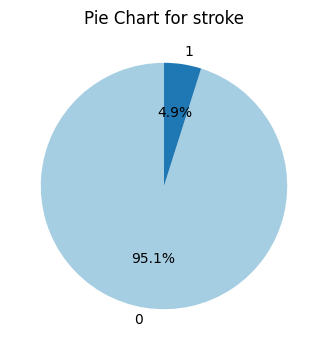

In [63]:
data = df['stroke'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Pie Chart for stroke')
plt.show()

**Analysis using plotting (visualization).**

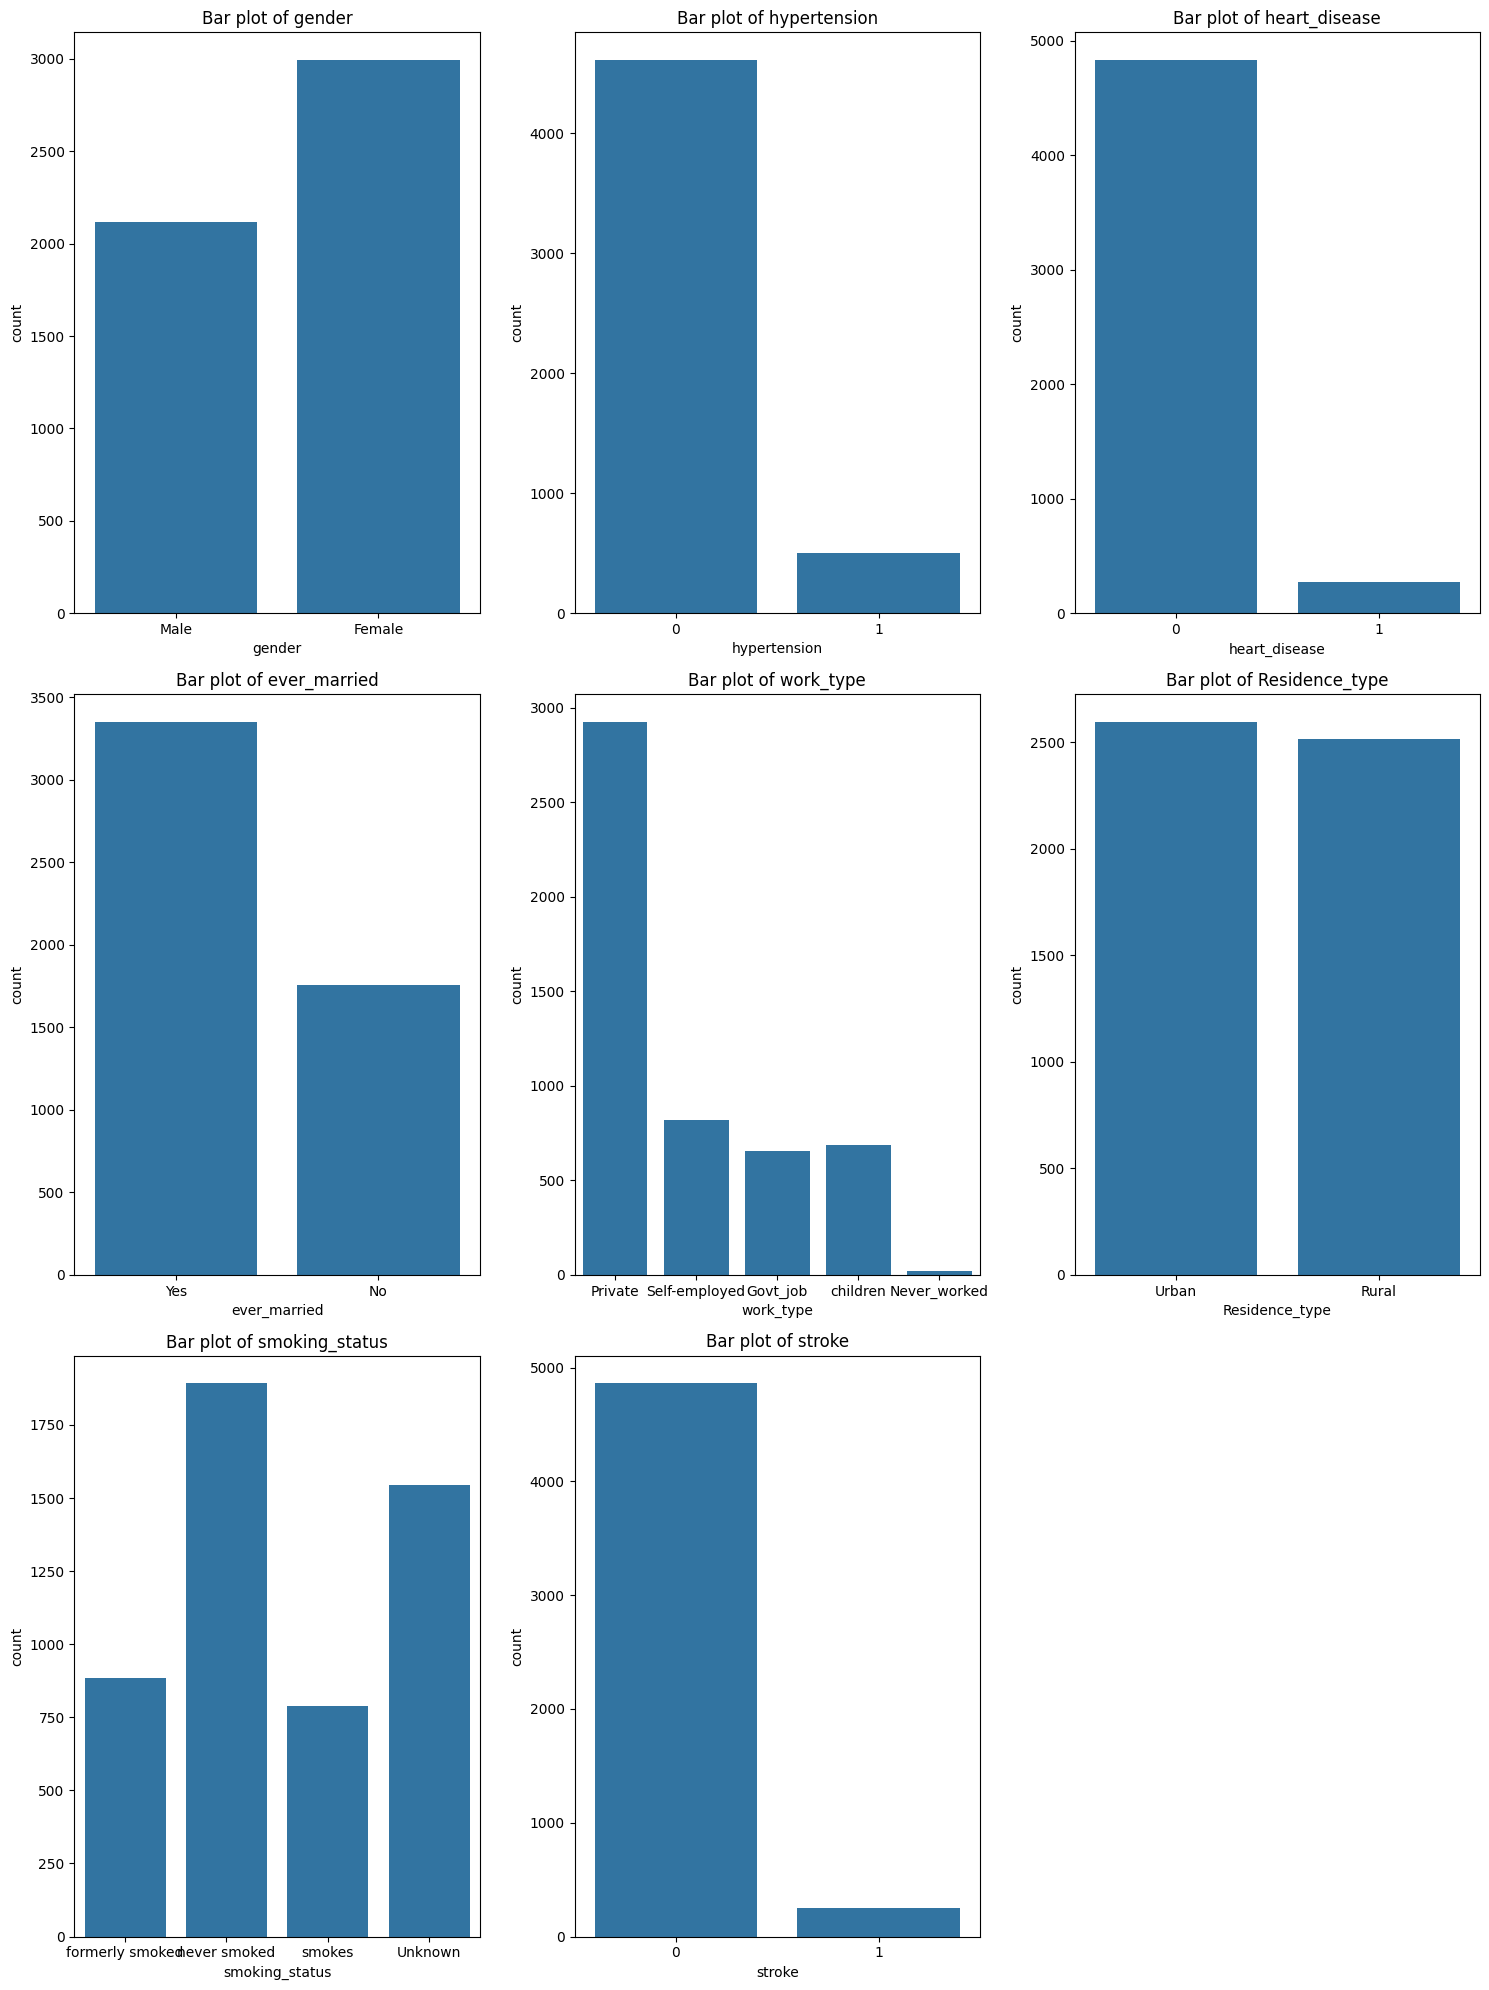

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
axes = axes.flatten()
# plotting 3*3 plots
for i, col in enumerate(categorical):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Bar plot of {col}')

#removing last 9th plot
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***Overall Observations using Unvariate analysis of Categorical variables:***
1. **Stroke**: The overwhelming majority of people in the dataset have not experienced a stroke, with a small fraction having suffered one.

2. **Hypertension**: While a considerable number of individuals have hypertension, there is a noticeable portion that does not suffer from it.

3. **Smoking Status**: "Never smoked" is the largest category, followed by a notable "Unknown" group, suggesting missing data. Those who "formerly smoked" or currently "smoke" form smaller proportions.

4. **Gender**: There’s a slight dominance of females in the dataset compared to males.

5. **Ever Married**: A large portion of the individuals have been married, while a smaller group has never been in a marriage.

6. **Residence Type**: Both "Urban" and "Rural" populations are fairly equally represented, implying a balance in residential distribution.

7. **Heart Disease**: A small segment of the population has heart disease, while most people in the dataset do not.

8. **Work Type**: The majority of people work in "Private" jobs. "Self-employed" and "Govt_job" are moderately common, while the categories "Never_worked" and "Children" are less frequent.

### ***Univariate Analysis of Numerical variables.***

**Analysis using Statistical measures.**

In [65]:
df[numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


**Analysis using plotting (visualization).**

**1. Using histogram**

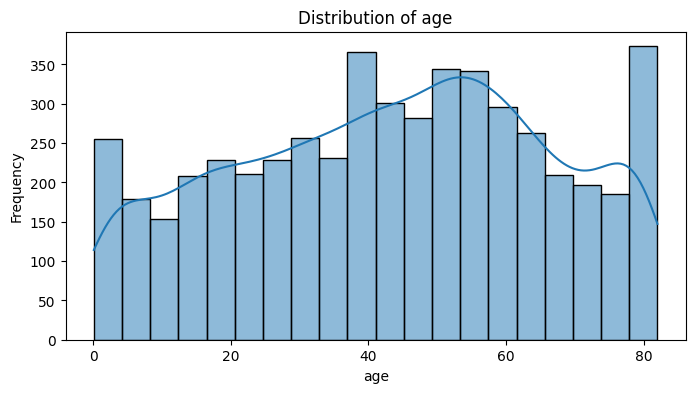

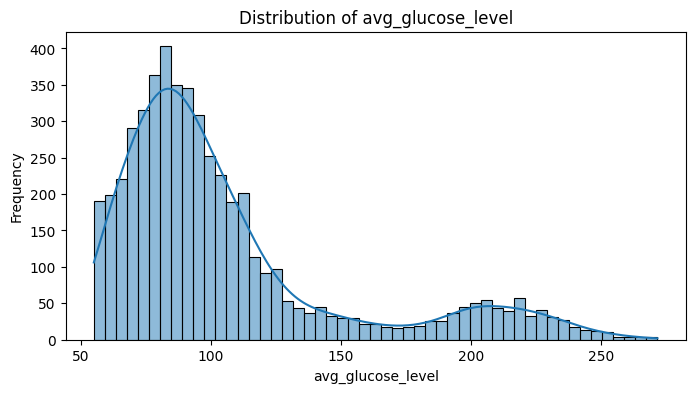

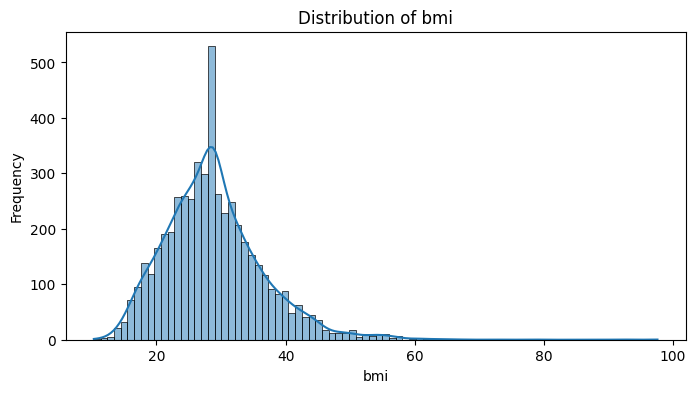

In [66]:
for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**2. Using box-plot**

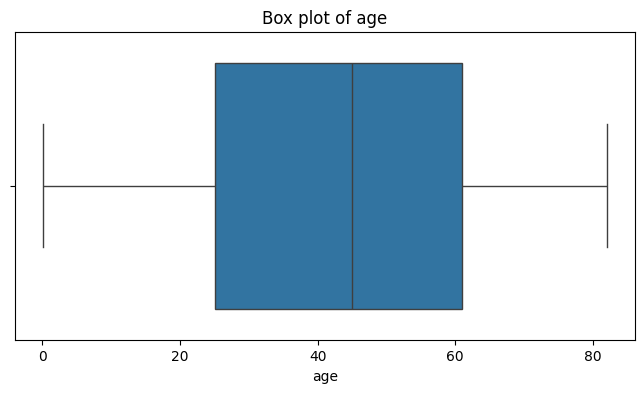

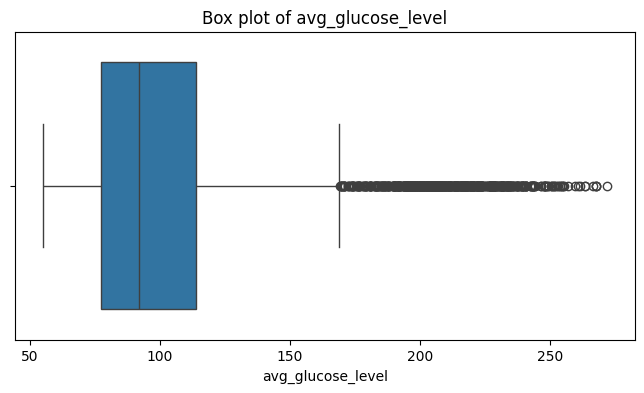

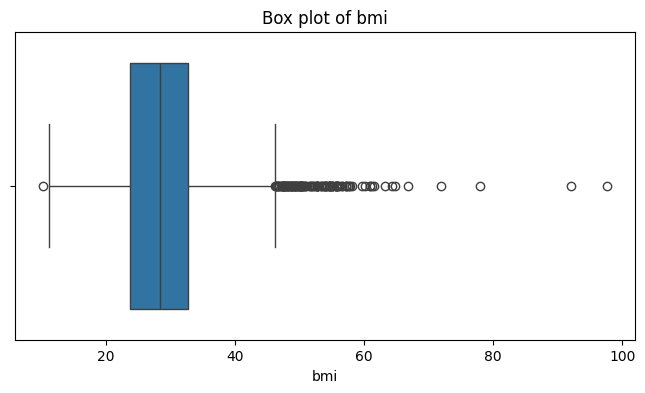

In [67]:
for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

***Overall Observations using Unvariate analysis of numerical variables:***
1. **Avg_glucose_level** : The glucose levels has large number of outliers, which indicates measurement errors.

2. **BMI** : The BMI(body-mass index) distribution shows some people in the obese range.

3. **Age** : Age has wide range from as low as some months old to maximum of 82 years.

# ***Bivariate Analysis***


# **Bivariate analysis of Numerical vs Numerical variables**

**Analysis using statistical measures.**

In [68]:
# Compute the correlation matrix   (Quantifies the strength and direction of the linear relationship.)
corr_matrix = df[numerical].corr()
corr_matrix

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.325942
avg_glucose_level,0.238171,1.000000,0.168751
bmi,0.325942,0.168751,1.000000


**Analysis using plotting (visualization).**

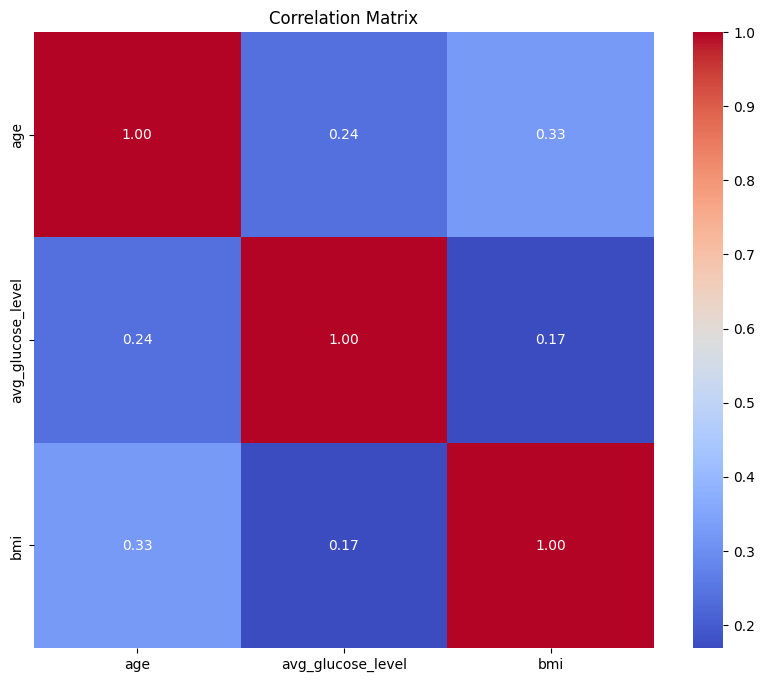

In [69]:
# Plot the correlation matrix as a heatmap  (Visual representation of correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

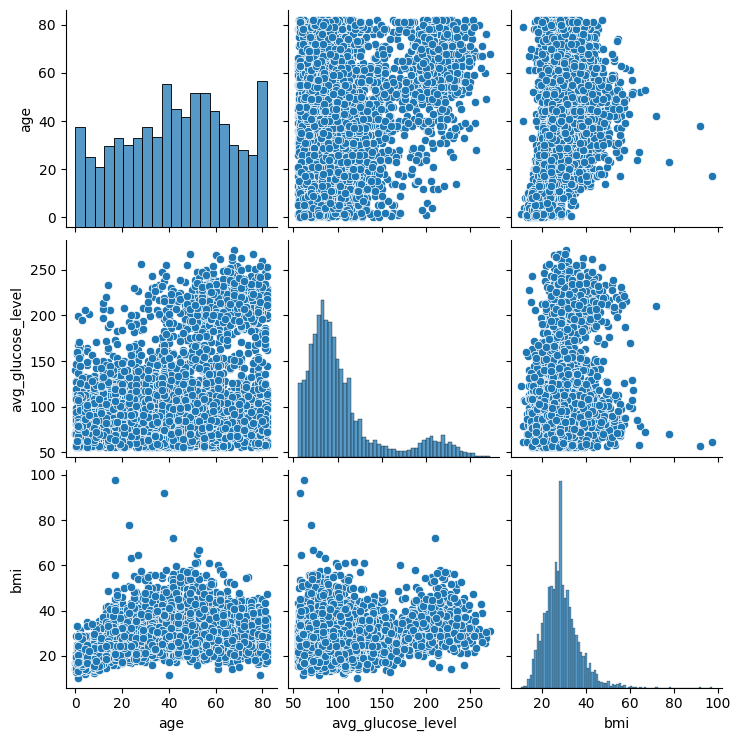

In [70]:
# Plot scatter plots for each pair of numerical columns (Visualizes the relationship between two numerical variables.)
sns.pairplot(df[numerical])
plt.show()

**Observations of bivariate analysis of numerical vs numerical variables:**
1. From correlation matrix, correlation between **'age'** and **'avg_glucose_level'** is **0.24**, which indicates **weak positive correlation**. Means as **age** increases **avg_glucose_level** increases but this correlation is weak.

2. From correlation matrix, correlation between **'age'** and **'bmi'** is **0.33**, which indicates **weak positive correlation**. Means as **age** increases **bmi** increases but this correlation is weak.

3. From correlation matrix, correlation between **'avg_glucose_level'** and **'bmi'** is **0.17**, which indicates **very weak positive correlation**. Hence, we can say **'avg_glucose_level'** and **'bmi'** are independent of each other.

# **Bivariate analysis of Categorical vs Categorical variables**

**Note :**

**Here, we will fix one categorical variable which is the target variable('stroke') and vary the second categorical variable (feature variable) to see if there exists correlation between 'stroke' and the other taken categorical variable(feature variable).**

### ***1. Does smoking status influence stroke risk?***

### ***Analysis using plotting(Visualisation) :***

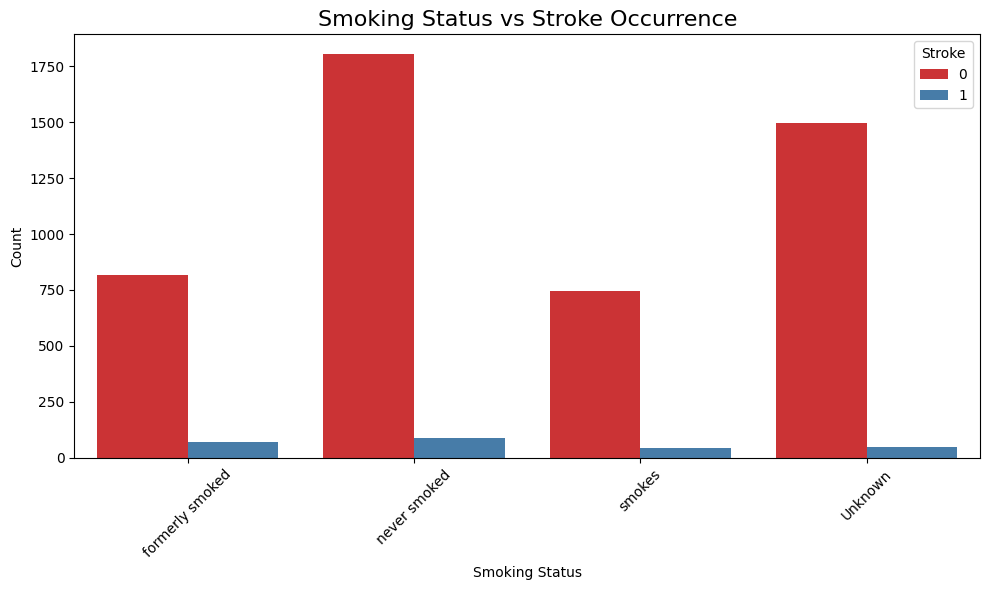

In [71]:
plt.figure(figsize=(10, 6))

sns.countplot(x='smoking_status', hue='stroke', data=df, palette='Set1')

# Add title and labels
plt.title('Smoking Status vs Stroke Occurrence', fontsize=16)
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***Statistical analysis : Chi-square test***

In [72]:
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 29.147269191399264
P-value: 2.0853997025008455e-06


###***Conclusion :***
**Based on above statistics, we can reject the null hypothesis. Hence, according to statistics, we can say that smoking status influences stroke risk (based on given data). Individuals who have smoked or currently smoke are more likely to experience stroke compared to those who have never smoked.**

### ***2. Does gender of a person influences stroke risk?***

### ***Analysis using plotting(Visualisation) :***

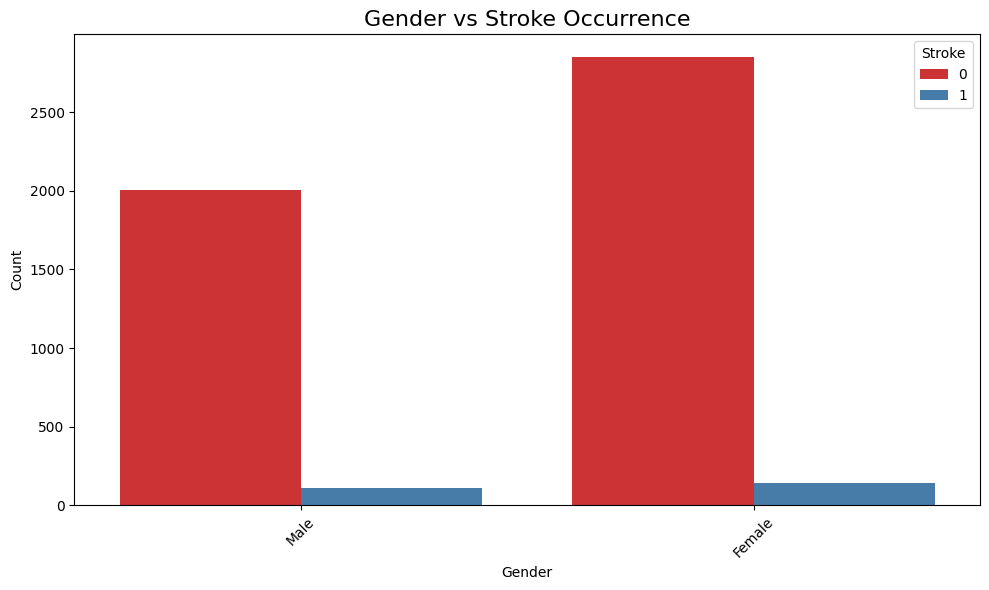

In [73]:
plt.figure(figsize=(10, 6))

sns.countplot(x='gender', hue='stroke', data=df, palette='Set1')

# Add title and labels
plt.title('Gender vs Stroke Occurrence', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***Statistical analysis : Chi-square test***

In [74]:
contingency_table = pd.crosstab(df['gender'], df['stroke'])

chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 0.340002536046177
P-value: 0.5598277580669416


###***Conclusion :***
**Based on above statistics, we fail to reject the null hypothesis. Hence, according to statistics, we can say that gender does not influences stroke risk (based on given data).**

### ***3. Does hypertension(blood pressure) of a person influences stroke risk?***

### ***Analysis using plotting(Visualisation) :***

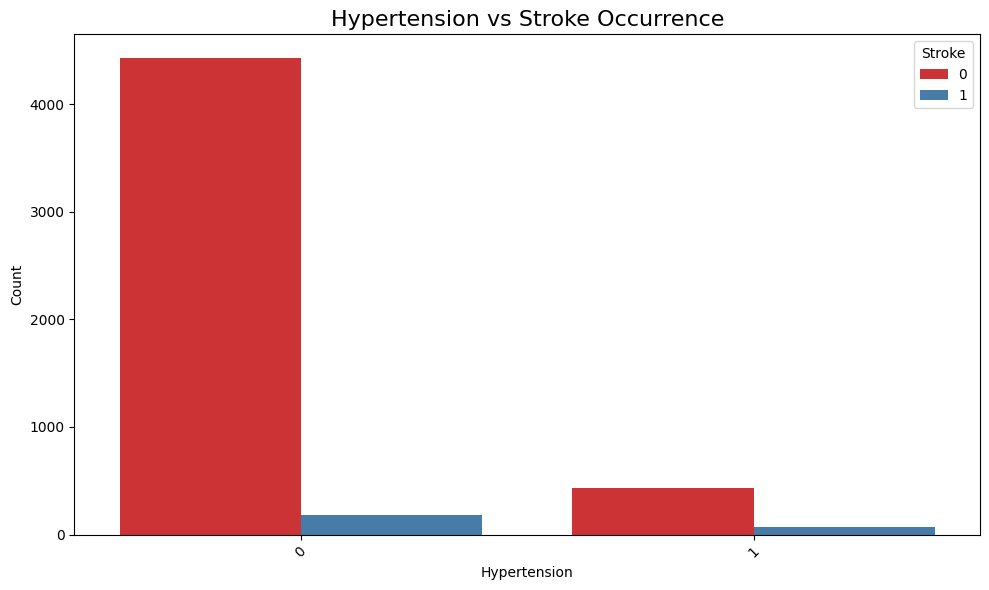

In [75]:
plt.figure(figsize=(10, 6))

sns.countplot(x='hypertension', hue='stroke', data=df, palette='Set1')

# Add title and labels
plt.title('Hypertension vs Stroke Occurrence', fontsize=16)
plt.xlabel('Hypertension')
plt.ylabel('Count')

plt.legend(title='Stroke', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***Statistical analysis : Chi-square test***

In [76]:
contingency_table = pd.crosstab(df['hypertension'], df['stroke'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 81.6053682482931
P-value: 1.661621901511823e-19


###***Conclusion :***
**Based on above statistics, we can reject the null hypothesis. The very-low p-value suggests strong association between hypertension and stroke risk. Hence, according to statistics, we can say that hypertension influences stroke risk (based on given data). Individuals with hypertension are more likely to experience stroke compared to those without hypertension.**


## **Note:**
**We will just perform Chi-square test (and not use visualisation) between remaining categorical feature variable and target varaible one-by-one and conclude the association between them.**

### ***4. Does heart-disease of a person influences stroke risk?***

In [77]:
contingency_table = pd.crosstab(df['heart_disease'], df['stroke'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 90.25956125843324
P-value: 2.0887845685229236e-21


###***Conclusion :***
**Based on above statistics, we can reject the null hypothesis. The very-low p-value suggests strong association between heart-disease and stroke risk. Hence, according to statistics, we can say that heart-disease influences stroke risk (based on given data). Individuals with heart-disease are more likely to experience stroke compared to those without hypertension.**


### ***5. Does Residence-type(urban or rural) of a person influences stroke risk?***

In [78]:
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 1.0816367471627524
P-value: 0.29833169286876987


###***Conclusion :***
**Based on above statistics, we fail to reject the null hypothesis. Hence, according to statistics, we can say that Residence-type(urban or rural) does not influences stroke risk (based on given data).**

### ***6. Does work-type of a person influences stroke risk?***

In [79]:
contingency_table = pd.crosstab(df['work_type'], df['stroke'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 49.163511976675295
P-value: 5.397707801896119e-10


###***Conclusion :***
**Based on above statistics, we can reject the null hypothesis. The low p-value suggests strong association between work-type and stroke risk.Hence, according to statistics, we can say that work-type influences stroke risk (based on given data).**

# **Bivariate analysis of Numerical vs Categorical variables**

**Note :**

**Here, we will fix categorical variable as the target variable('stroke') and vary the numerical variable (feature variable) to see if there exists correlation between 'stroke' and the other taken numerical variable(feature variable).**

### ***1. Does age of a person influences stroke-risk?***

### ***Analysis using plotting(Visualisation) :***

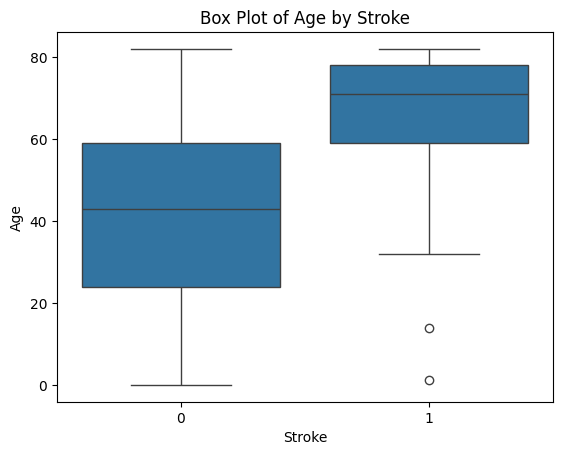

In [80]:
#box-plot
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Box Plot of Age by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

**From above box plot, it suggests a positive association between age and stroke occurrence i.e as age increases, possibility of stroke increases. Older individuals are more likely to experience stroke compared to younger individuals. However, the outliers in the stroke group shows that there are exceptions.**

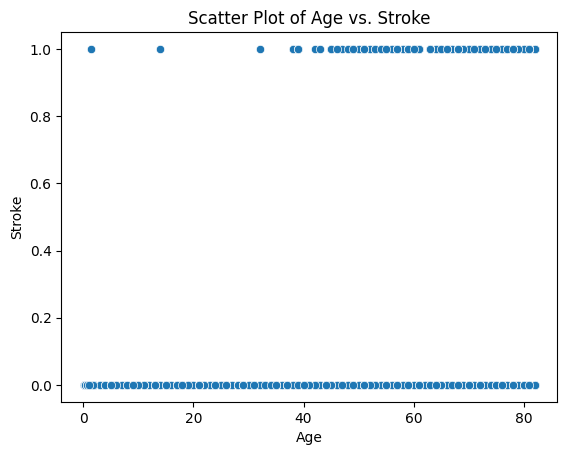

In [81]:
#scatter plot
sns.scatterplot(x='age', y='stroke', data=df)
plt.title('Scatter Plot of Age vs. Stroke')
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.show()

 **From  above scatter-plot, as age increases, the probability of stroke also increases. This comes from the concentration of data points in the upper right corner of the plot. Hence, positive association between age and stroke occurrence.**

### ***Statistical analysis : z-test for independence***

In [82]:
from statsmodels.stats.weightstats import ztest as ztest

stroke_entries = df['age'][df['stroke'] == 1]
no_stroke_entries = df['age'][df['stroke'] == 0]

# Perform independent t-test
z_statistic, p_value = ztest(stroke_entries, no_stroke_entries)

# Print the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: 18.08083426887953
P-value: 4.512034549927382e-73


###***Conclusion :***
**Based on above statistics, we can reject the null hypothesis. The very-low p-value suggests strong association between age and stroke risk.Hence, according to statistics, we can say that age influences stroke risk (based on given data).**

### ***2. Does average-glucose-level of a person influences stroke-risk?***

### ***Analysis using plotting(Visualisation) :***

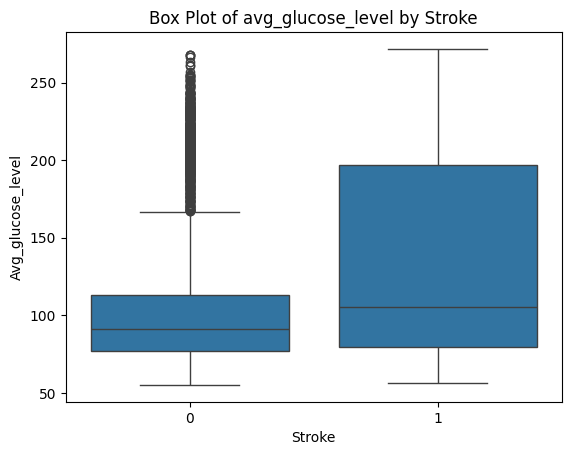

In [83]:
#box-plot
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Box Plot of avg_glucose_level by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Avg_glucose_level')
plt.show()

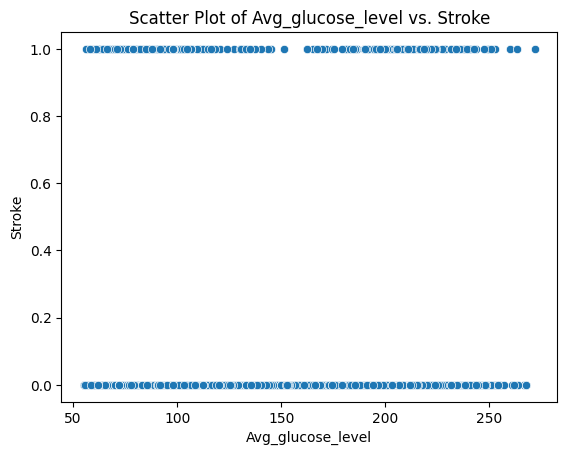

In [84]:
#scatter plot
sns.scatterplot(x='avg_glucose_level', y='stroke', data=df)
plt.title('Scatter Plot of Avg_glucose_level vs. Stroke')
plt.xlabel('Avg_glucose_level')
plt.ylabel('Stroke')
plt.show()

### ***Statistical analysis : z-test for independence***

In [85]:
from statsmodels.stats.weightstats import ztest as ztest

stroke_entries = df['avg_glucose_level'][df['stroke'] == 1]
no_stroke_entries = df['avg_glucose_level'][df['stroke'] == 0]

# Perform independent t-test
z_statistic, p_value = ztest(stroke_entries, no_stroke_entries)

# Print the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: 9.513352175431471
P-value: 1.8461548402658107e-21


###***Conclusion :***
**Based on above statistics, we can reject the null hypothesis. The very-low p-value suggests strong association between avg-glucose-level and stroke risk.Hence, according to statistics, we can say that avg-glucose-level influences stroke risk (based on given data).**

### ***3. Does BMI (body-mass-index) of a person influences stroke-risk?***

### ***Analysis using plotting(Visualisation) :***

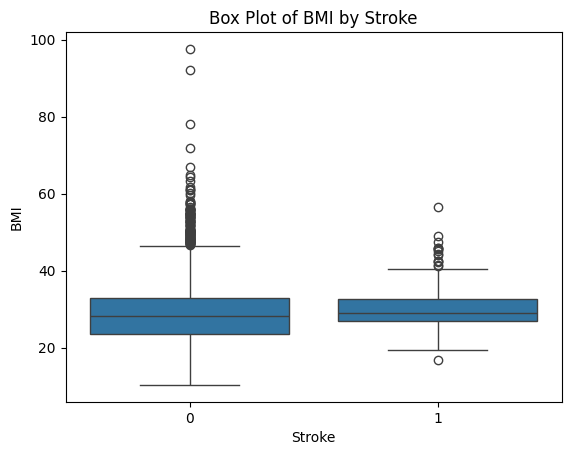

In [86]:
#box-plot
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('Box Plot of BMI by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

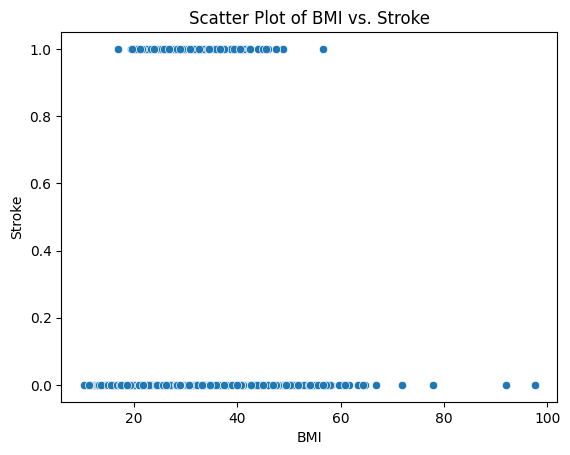

In [87]:
#scatter plot
sns.scatterplot(x='bmi', y='stroke', data=df)
plt.title('Scatter Plot of BMI vs. Stroke')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()

### ***Statistical analysis : z-test for independence***

In [88]:
from statsmodels.stats.weightstats import ztest as ztest

stroke_entries = df['bmi'][df['stroke'] == 1]
no_stroke_entries = df['bmi'][df['stroke'] == 0]

# Perform independent t-test
z_statistic, p_value = ztest(stroke_entries, no_stroke_entries)

# Print the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: 2.785637387412078
P-value: 0.005342259582859967


###***Conclusion :***
**Based on above statistics, p-value is very close (and greater than) to 0.05 and hence, we fail to reject the null hypothesis. Hence, weak association between bmi and stroke risk.**

# ***Multivariate Analysis***

### ***In multivariate analysis, we will check how do multiple factors, such as age, hypertension, heart disease and other such factors collectively relate to stroke?***

### ***1. Does the combination of 'age' and 'smoking status' factors influence the stroke risk?***

In [89]:
# creating pivot-table
data = df.copy()

data['age_group'] = pd.cut(data['age'], bins=[1, 25, 40, 60, 70, 80, 90], labels=['1-25', '26-40', '41-60', '61-70', '71-80', '81-90'])

# Creating a pivot table for the heatmap
pivot_table = data.pivot_table(values='stroke', index='smoking_status', columns='age_group', aggfunc='mean')

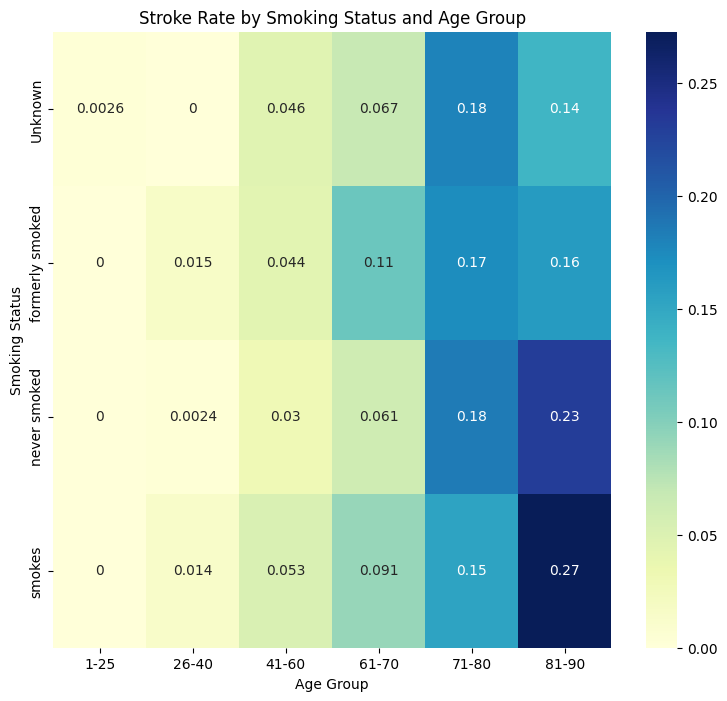

In [90]:
# Plotting the heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Stroke Rate by Smoking Status and Age Group')
plt.ylabel('Smoking Status')
plt.xlabel('Age Group')
plt.show()

###***Conclusion :***
**1. Smoking-status : Across all age groups, generally, person with a smoking history (formerly smoked, smokes) have a higher risk of stroke compared to those who never smoked.**

**2. Age :  Trend in the above heatmap, as we go from left to right in each row, it indicates that the risk of stroke increases with age, regardless of smoking status.**

**3. Combination of age and smoking : Smoking seems to have a greater impact on the risk of stroke in older age groups. For instance, the gap in stroke rates between smokers and non-smokers is more profound in the 61-70, 71-80, and 81-90 age ranges.**

### ***2. Does the combination of 'residence-type' and 'work-*type*' factors influence the stroke risk?***

In [91]:
# Creating a contingency table
contingency_work_residence = pd.crosstab(index=[df['work_type'], df['Residence_type']], columns=df['stroke'])
contingency_work_residence

stroke                           0   1
work_type     Residence_type          
Govt_job      Rural            298  14
              Urban            326  19
Never_worked  Rural              7   0
              Urban             15   0
Private       Rural           1394  68
              Urban           1382  81
Self-employed Rural            362  31
              Urban            392  34
children      Rural            339   1
              Urban            346   1

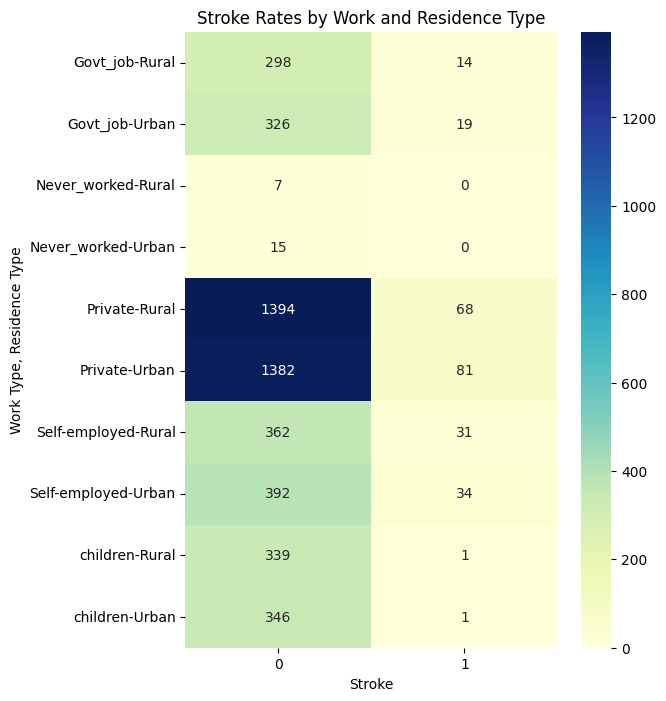

In [92]:
# heatmap from the above contingency table created
plt.figure(figsize=(6, 8))
sns.heatmap(contingency_work_residence, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Stroke Rates by Work and Residence Type')
plt.ylabel('Work Type, Residence Type')
plt.xlabel('Stroke')
plt.show()

###***Conclusion :***
**1. Work-type : People in the "Private" work category experience the most strokes, with "Self-employed" and "Govt_job" following behind. The "Never_worked" and "Children" groups show very few stroke cases.**

**2. Residence-type :  There are no significant differences in stroke occurrence between rural and urban residents across most work types. This was already concluded using bivariate analysis of residence-type vs stroke-risk.**

**3. Combination of residence-type and work-type : The highest number of strokes is found among individuals with a "Private" work type living in rural areas. Additionally, "Self-employed" individuals residing in urban areas also show a relatively high occurrence of strokes.**

In [93]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_work_residence)
print("Chi-square Statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("P-value:", p_value)

Chi-square Statistic: 50.7718380858716
Degrees of freedom: 9
P-value: 7.709380016562564e-08


###***Conclusion :***
**1. Degrees of freedom : Using 9 degrees of freedom, the test examined different combinations of these two factors.**

**2. Chi-square statistic :  The value of 50.77 is significantly high, indicating that there are substantial differences in the distribution of stroke cases among various combinations of work and residence types.**

**3. P-value : The p-value is much lower than the typical alpha level of 0.05. This extremely small p-value prompts us to reject the null hypothesis, which states that there is no relationship between the combinations of work type and residence type and stroke rates.**

### ***3. How do multiple factors, such as age, hypertension, and heart disease, collectively relate to stroke?***

### ***Using Logistic regression***

In [94]:
import statsmodels.api as sm
data = df.copy()

# Adding an intercept for the logistic regression
data['intercept'] = 1

data['age'] = data['age'].astype(float)
logit_model = sm.Logit(data['stroke'], data[['intercept', 'age', 'hypertension', 'heart_disease']])
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.156908
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5106
Method:                           MLE   Df Model:                            3
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                  0.1943
Time:                        17:10:09   Log-Likelihood:                -801.80
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 1.624e-83
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -7.1030      0.336    -21.112      0.000      -7.762      -6.444
age               0.0704      0.005     13.843      0.000       0.060       0.080
hypertension      0.4577      0.161      2.848      0.004       0.143       0.773
heart_disease     0.4083      0.186      2.195      0.028       0.044       0.773
=================================================================================
"""

###***Conclusion :***
**Using P>|z| from above table and logsitic regression, we can conclude that :**

***1. Age: The analysis indicates that age is a significant factor in increasing the likelihood of stroke, demonstrating a gradual and consistent impact.***

***2. Hypertension: Hypertension is shown to have a considerable effect on stroke risk, suggesting that individuals with high blood pressure are at a greater risk.***

***3. Heart Disease: The presence of heart disease significantly raises the likelihood of stroke, indicating a strong association between cardiovascular health and stroke incidence.***

***4. Combined Effects: Together, age, hypertension, and heart disease contribute notably to stroke risk, highlighting the importance of monitoring these factors for better stroke prevention strategies.***